# Introducción a python 

## Métodos Númericos: Interpolación

La interpolación consiste en estimar el valor de una $f(\vec{x})$ con base en un conjunto de valores $y_i = f(\vec{x_i}$ conocidos. El valor a interpolar debe de estar delimitado por el conjunto de puntos.

En una dimensión el valor a interpolar debe de encontrarse en el intervalo $[\min(x_i), \max(x_i)].$

En n-dimensiones el valor debe de encontrarse en la **envoltura convexa** del conjunto de datos, es decir, la hipersuperficie mas pequeña que contiene al conjunto de puntos.

Por lo general la interpolación ajusta o determina los coeficientes de una función conocida para posteriormente evaluar dicha función en el punto desconocido.

Consideremos la función: $$y = e^{-(x-1)^2}-\frac{x-3}{20}^2 +\frac{1}{10}\cos(2\pi x) +0.5.$$ Escribimos una función en python que la implemente y obtenemos algunos puntos distribuidos uniformemente en el intervalo $[-5,5]$:

In [1]:
import numpy

def fx(x):
    y=numpy.exp(-(x-1)**2)-((x-3)/20)**2+0.1*numpy.cos(2*numpy.pi*x) +0.5
    return y
N=13
xi = numpy.linspace(-5,5, N)
yi = fx(xi)

Ahora graficamos:

Text(0, 0.5, '$f(x)$')

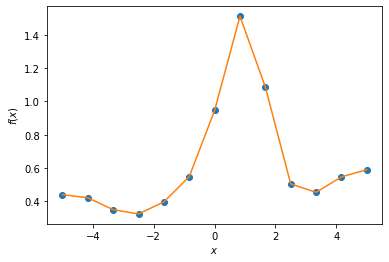

In [5]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(xi,yi, 'o', label = "N=%d"%N)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

Con la **interpolación polinomial** usamos un polinomio de grado N-1 para representar nuestros datos:

Text(0, 0.5, '$f(x)$')

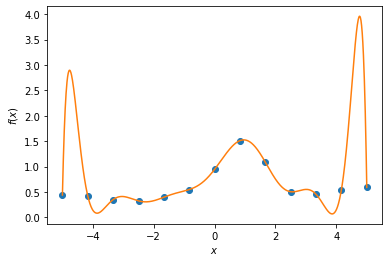

In [3]:
from scipy import interpolate as interp

x_eval = numpy.linspace(-5,5,1000)
poly = interp.lagrange (xi,yi)
y_interp = poly(x_eval)

plt.plot(xi,yi, 'o', label = "N=%d"%N)
plt.plot(x_eval, y_interp)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")


Como podemos ver, la interpolación polinómica es inestable hacia los extremos del intervalo. Una mejor solución es utilizar un polinomio lineal, o un spline cúbico definido por un subconjunto de puntos:

Text(0, 0.5, '$f(x)$')

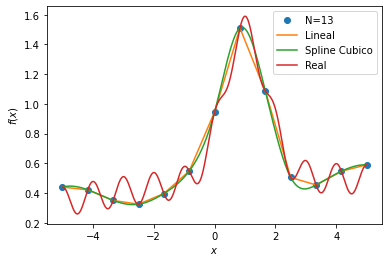

In [6]:
interp_lineal = interp.interp1d (xi,yi)
interp_spline = interp.interp1d (xi,yi, kind = "cubic") #Spline cubico

y_interp_lin = interp_lineal(x_eval)
y_interp_spline = interp_spline(x_eval)

plt.plot(xi,yi, 'o', label = "N=%d"%N)
plt.plot(x_eval, y_interp_lin, label ="Lineal")
plt.plot(x_eval, y_interp_spline, label ="Spline Cubico")
plt.plot(x_eval, fx(x_eval), label ="Real")
plt.legend (loc="best")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")


En n-dimensiones existen dos familias de métodos: 

(1) usando valores ordenados en una malla (datos estructurados)

(2) usando datos sin una estructura definida (datos no estructurados)

Veamos un ejemplo para datos en una malla:

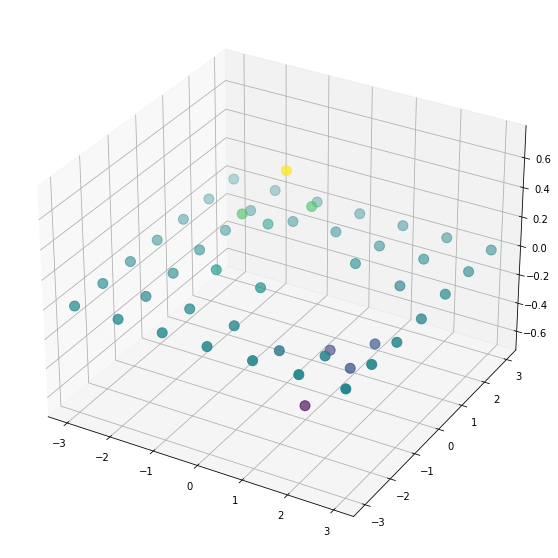

In [7]:
import numpy as np
import matplotlib as mpl

x = np.arange(-3.01, 3.01, 1.0)
y = np.arange(-3.01, 3.01, 1.0)
xx, yy = np.meshgrid(x, y)

#Un modelo de doble gaussiana
z = np.exp(-(xx**2+yy**2))-np.exp(-((xx-1)**2+(yy+0.5)**2))

colorNorm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.scatter(xx,yy,z, c = colorNorm(z), s = 100, cmap="viridis")


Ahora usamos la función interp2d para realizar la interpolación

In [8]:
f = interp.interp2d(x, y, z, kind='cubic')

Y creamos unas matrices a una mayor resolución para evaluar:

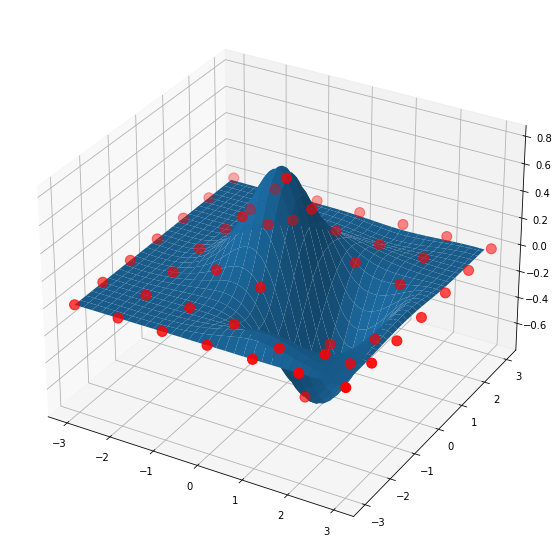

In [9]:
xi = np.arange(x.min(),x.max(),0.1)
yi = np.arange(y.min(),y.max(),0.1)
xxi,yyi = np.meshgrid(xi,yi)
zz = f(xi,yi)

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xxi,yyi,zz,
                       linewidth=1)
ax.scatter(xx,yy,z, color = "red", s = 100)

Ahora con la interpolación no uniforme:

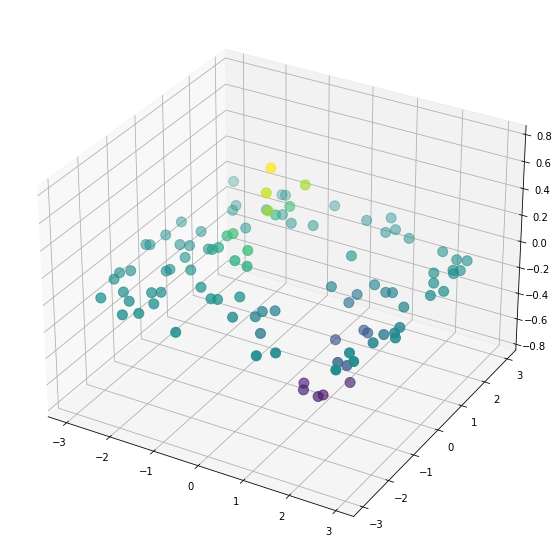

In [10]:
N = 100

xri = np.random.uniform(x.min(),x.max(),size=N)
yri = np.random.uniform(y.min(),y.max(),size=N)

zri = np.exp(-(xri**2+yri**2))-np.exp(-((xri-1)**2+(yri+0.5)**2))


fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

ax.scatter(xri,yri,zri, c = colorNorm(zri), s = 100, cmap="viridis")

Ahora usamos la función **griddata** para interpolar a una malla uniforme

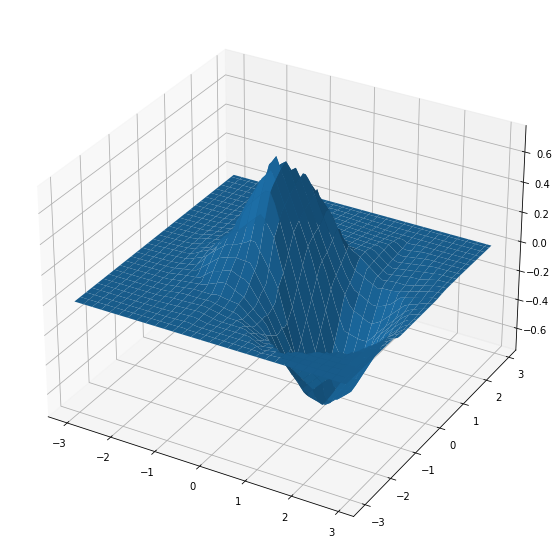

In [11]:
puntos_conocidos = np.vstack([xri,yri]).T
puntos_evaluar = np.vstack([xxi.flatten(),yyi.flatten()]).T
zz = interp.griddata (puntos_conocidos, zri, puntos_evaluar, fill_value=0)
zz = zz.reshape(xxi.shape)

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot_surface(xxi,yyi,zz,
                       linewidth=1)